# Download CIFAR

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_name = 'generate_cifar.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    print(path_to_file)
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    os.chdir(path_to_file)
    !pwd

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./temp', train=True,
                                        download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./temp', train=False,
                                       download=True, transform=transforms.ToTensor())
print(len(trainset))
print(len(testset))

Files already downloaded and verified
50000
10000


torch.Size([3, 32, 32])
min= tensor(0.0784)   max= tensor(1.)


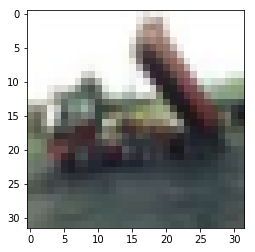

9


In [5]:
idx=2
pic, label =trainset[idx]
print(pic.size())
print('min=',torch.min(pic), '  max=',torch.max(pic) )
plt.imshow( np.transpose(  pic.numpy() , (1, 2, 0))  )
plt.show()
print(label)

In [6]:
train_data=torch.Tensor(50000,3,32,32)
train_label=torch.LongTensor(50000)
for idx , example in enumerate(trainset):
    train_data[idx]=example[0]
    train_label[idx]=example[1]
torch.save(train_data,'train_data.pt')
torch.save(train_label,'train_label.pt')

In [7]:
test_data=torch.Tensor(10000,3,32,32)
test_label=torch.LongTensor(10000)
for idx , example in enumerate(testset):
    test_data[idx]=example[0]
    test_label[idx]=example[1]
torch.save(test_data,'test_data.pt')
torch.save(test_label,'test_label.pt')